In [1]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns


In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = plt.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.35, 0.95, 256)))

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
print(f'Data set features: n={mnist.data.shape[0]}, d={mnist.data.shape[1]}')
print(f'Data set targets: n={mnist.target.shape[0]}')

Data set features: n=70000, d=784
Data set targets: n=70000


An element (row) corresponds to a gray-scale image encoded as a matrix 28x28 reals in [0,255] (higher value = darker color)

In [6]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = np.array(mnist.data)
t = np.array(mnist.target)

In [6]:
t = t.astype(int)
np.unique(t)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
print(X[0,:])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
def displayData(X, t, rows=10, cols=10, img_ind=None, size =8, class_value = False):
    if len(X)>rows*cols:
        img_ind = np.random.permutation(len(X))[0:rows * cols]
    else:
        img_ind = range(rows*cols)
    fig = plt.figure(figsize = (12,12))
    fig.patch.set_facecolor('white')
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow([255-x for x in X[img_ind[i]].reshape(28,28)], cmap='gray', interpolation='gaussian')
        if class_value:
            plt.title("{}".format(t[img_ind[i]]),fontsize = 10, color=colors[4])
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.axis('off')
    plt.show()

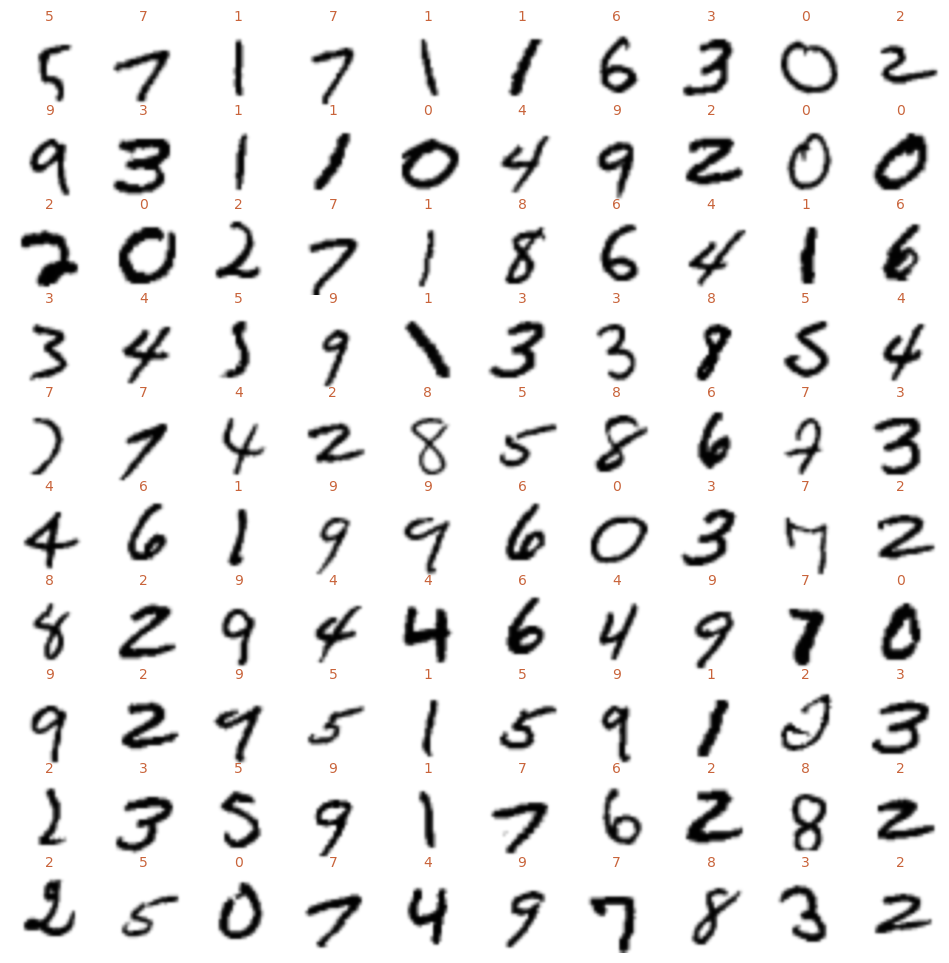

In [12]:
displayData(X[100:200], t[100:200], class_value=True)

In [9]:
t[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

Splitting data into 70% training and 30% test data:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=1, stratify=t)

In [11]:
t_train.shape

(49000,)

In [13]:
print(f'Data set: {X.shape[0]} items') 
for i in np.unique(t):
    print(f'Class {i}: {X[t==i].shape[0]} items ({X[t==i].shape[0]/X.shape[0]*100:.2f}%)')
print()
print(f'Training set: {X_train.shape[0]} items')
for i in np.unique(t):
    print(f'Class {i}: {X_train[t_train==i].shape[0]} items ({X_train[t_train==i].shape[0]/X_train.shape[0]*100:.2f}%)') 
print()
print(f'Test set: {X_test.shape[0]} items')
for i in np.unique(t):
    print(f'Class {i}: {X_test[t_test==i].shape[0]} items ({X_test[t_test==i].shape[0]/X_test.shape[0]*100:.2f}%)')


Data set: 70000 items
Class 0: 6903 items (9.86%)
Class 1: 7877 items (11.25%)
Class 2: 6990 items (9.99%)
Class 3: 7141 items (10.20%)
Class 4: 6824 items (9.75%)
Class 5: 6313 items (9.02%)
Class 6: 6876 items (9.82%)
Class 7: 7293 items (10.42%)
Class 8: 6825 items (9.75%)
Class 9: 6958 items (9.94%)

Training set: 49000 items
Class 0: 4832 items (9.86%)
Class 1: 5514 items (11.25%)
Class 2: 4893 items (9.99%)
Class 3: 4999 items (10.20%)
Class 4: 4777 items (9.75%)
Class 5: 4419 items (9.02%)
Class 6: 4813 items (9.82%)
Class 7: 5105 items (10.42%)
Class 8: 4777 items (9.75%)
Class 9: 4871 items (9.94%)

Test set: 21000 items
Class 0: 2071 items (9.86%)
Class 1: 2363 items (11.25%)
Class 2: 2097 items (9.99%)
Class 3: 2142 items (10.20%)
Class 4: 2047 items (9.75%)
Class 5: 1894 items (9.02%)
Class 6: 2063 items (9.82%)
Class 7: 2188 items (10.42%)
Class 8: 2048 items (9.75%)
Class 9: 2087 items (9.94%)


## Modeling class probabilities via logistic (softmax) regression

### Training a softmax regression model with scikit-learn

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
logreg = LogisticRegression()

model = Pipeline([('scale', scaler), ('clf', logreg)])

model.set_params(clf__C=1e5, clf__solver='saga')
model = model.fit(X_train, t_train)

/Users/giorgio/opt/anaconda3/envs/py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
model.named_steps['scale'].scale_

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       4.51749342e-02, 9.75778578e-01, 9.75778578e-01, 4.06574408e-02,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.22798947e-02, 2.15375243e-01, 1.16738600e+00, 2.27768579e+00,
       2.27861992e+00, 3.22178509e+00, 5.16567373e+00, 5.75115186e+00,
       6.08780071e+00, 5.93713527e+00, 6.45561739e+00, 6.54107117e+00,
       5.88859954e+00, 5.10000986e+00, 3.94083612e+00, 3.47981132e+00,
       3.02619244e+00, 1.32627319e+00, 1.22804432e+00, 8.92520883e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [21]:
model.named_steps['scale'].scale_

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       4.51749342e-02, 9.75778578e-01, 9.75778578e-01, 4.06574408e-02,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.22798947e-02, 2.15375243e-01, 1.16738600e+00, 2.27768579e+00,
       2.27861992e+00, 3.22178509e+00, 5.16567373e+00, 5.75115186e+00,
       6.08780071e+00, 5.93713527e+00, 6.45561739e+00, 6.54107117e+00,
       5.88859954e+00, 5.10000986e+00, 3.94083612e+00, 3.47981132e+00,
       3.02619244e+00, 1.32627319e+00, 1.22804432e+00, 8.92520883e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [22]:
model.named_steps['clf'].coef_.shape

(10, 784)

In [23]:
model.named_steps['clf'].intercept_.shape

(10,)

In [24]:
y_train = model.predict(X_train)
y_test = model.predict(X_test)

p_train = model.predict_proba(X_train)
p_test = model.predict_proba(X_test)



In [25]:
p_test[:5]

array([[1.15426557e-01, 5.35639289e-07, 4.14397763e-09, 1.69027585e-09,
        6.94699415e-05, 8.67728643e-01, 1.08689845e-05, 3.74287029e-05,
        1.67263201e-02, 1.70638076e-07],
       [3.97039637e-04, 2.63203870e-06, 4.58891772e-08, 1.25227738e-08,
        3.06353768e-04, 9.98830283e-01, 1.01737854e-05, 1.47004900e-06,
        4.51506025e-04, 4.83760314e-07],
       [4.83726855e-04, 1.34150547e-03, 1.66384833e-02, 1.48964611e-06,
        1.67235854e-01, 8.35388201e-08, 1.67420914e-01, 4.88375936e-01,
        2.80939411e-02, 1.30408065e-01],
       [9.99586244e-01, 2.25596746e-06, 1.08795495e-07, 4.10933794e-08,
        2.60616869e-06, 1.72841064e-04, 2.15543231e-04, 7.67022338e-06,
        1.17232240e-05, 9.65927266e-07],
       [4.19303260e-03, 4.71236305e-05, 8.59801451e-03, 3.96128372e-06,
        3.69016177e-03, 6.28396770e-03, 9.76723877e-01, 4.41562618e-04,
        4.23935906e-07, 1.78748643e-05]])

In [26]:
y_test[:5]

array([5, 5, 7, 0, 6])

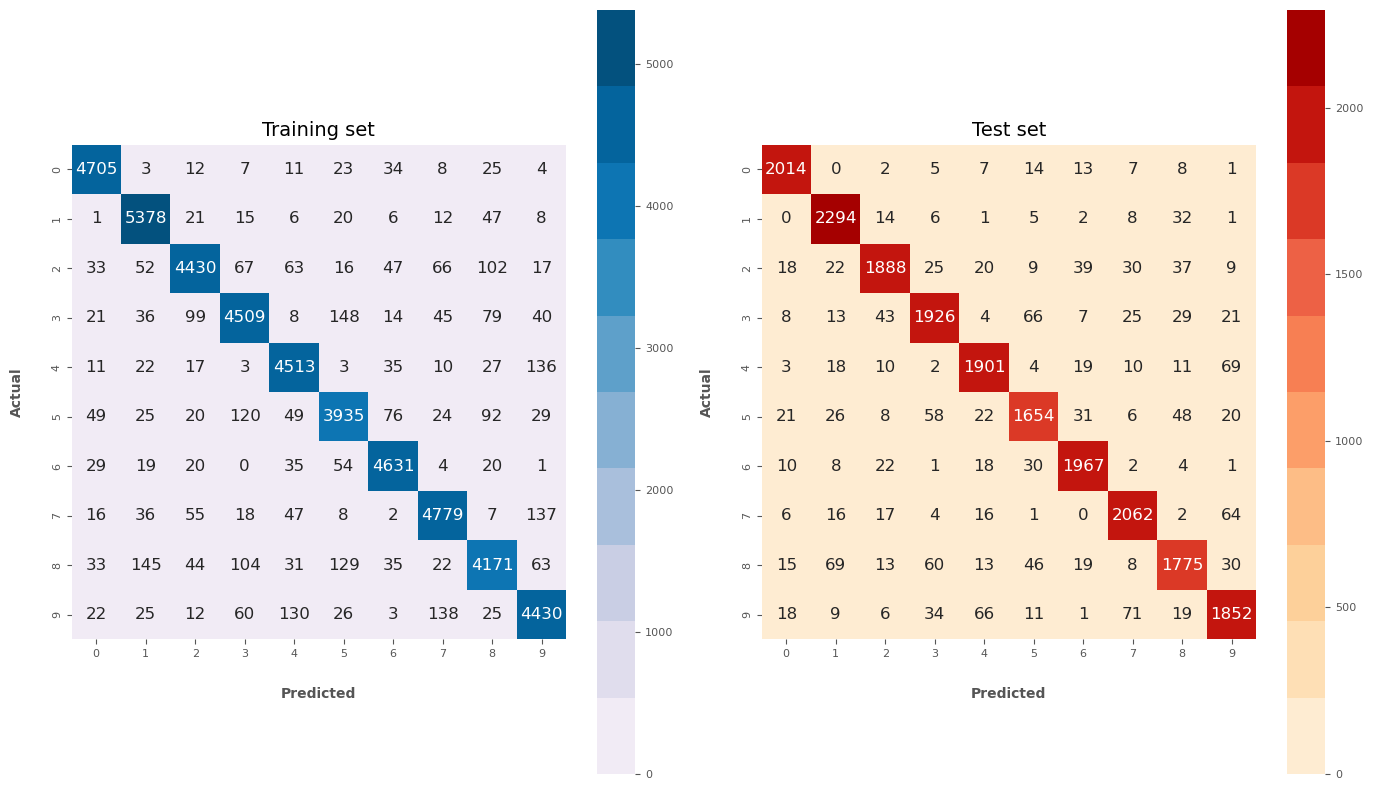

In [27]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(t_train, y_train),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(t_test, y_test),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import classification_report

print('Training set')
print(classification_report(t_train, y_train))
print('Test set')
print(classification_report(t_test, y_test))

Training set
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4832
           1       0.94      0.98      0.96      5514
           2       0.94      0.91      0.92      4893
           3       0.92      0.90      0.91      4999
           4       0.92      0.94      0.93      4777
           5       0.90      0.89      0.90      4419
           6       0.95      0.96      0.96      4813
           7       0.94      0.94      0.94      5105
           8       0.91      0.87      0.89      4777
           9       0.91      0.91      0.91      4871

    accuracy                           0.93     49000
   macro avg       0.93      0.93      0.93     49000
weighted avg       0.93      0.93      0.93     49000

Test set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2071
           1       0.93      0.97      0.95      2363
           2       0.93      0.90      0.92      2097
  

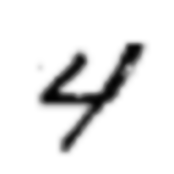

In [73]:
idx = 89
x = X[idx,:]
y = t[idx]
plt.figure(figsize = (2,2))
plt.imshow(x.reshape(28,28), cmap='Greys', interpolation='quadric')
plt.grid(None)
plt.axis('off')
plt.show()

In [74]:
print(f"This is a {y}")

This is a 4


In [75]:
predictions_probs = model.predict_proba(x.reshape(1,-1)).squeeze()
predicted_class = np.squeeze(np.argmax(predictions_probs, axis=-1))
print("Predicted probabilities: ["+", ".join('%5.4f'%pp for pp in predictions_probs)+"]")
print(f"Class: {y}. Prediction: {predicted_class}")

Predicted probabilities: [0.0002, 0.0000, 0.0000, 0.0000, 0.9968, 0.0001, 0.0003, 0.0010, 0.0001, 0.0015]
Class: 4. Prediction: 4


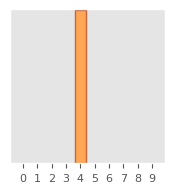

In [76]:
plt.figure(figsize = (2,2))
thisplot = plt.bar(range(10), predictions_probs, color="#77aaaa")
plt.ylim([0, 1]) 
thisplot[predicted_class].set_color(colors[0])
thisplot[y].set_edgecolor(colors[4])
thisplot[y].set_linewidth(1)
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
plt.show()

### Dataset limitato alle sole due prime features

In [40]:
i1, i2 = 350,410
X_train_reduced, X_test_reduced = X_train[:,[i1,i2]], X_test[:,[i1,i2]]

In [41]:
model_red = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())])

model_red.set_params(clf__C=1e5, clf__max_iter=200, clf__solver='saga')
model_red = model_red.fit(X_train_reduced, t_train)

In [42]:
y_train_reduced = model_red.predict(X_train_reduced)
y_test_reduced = model_red.predict(X_test_reduced)
p_train_reduced = model_red.predict_proba(X_train_reduced)
p_test_reduced = model_red.predict_proba(X_test_reduced)

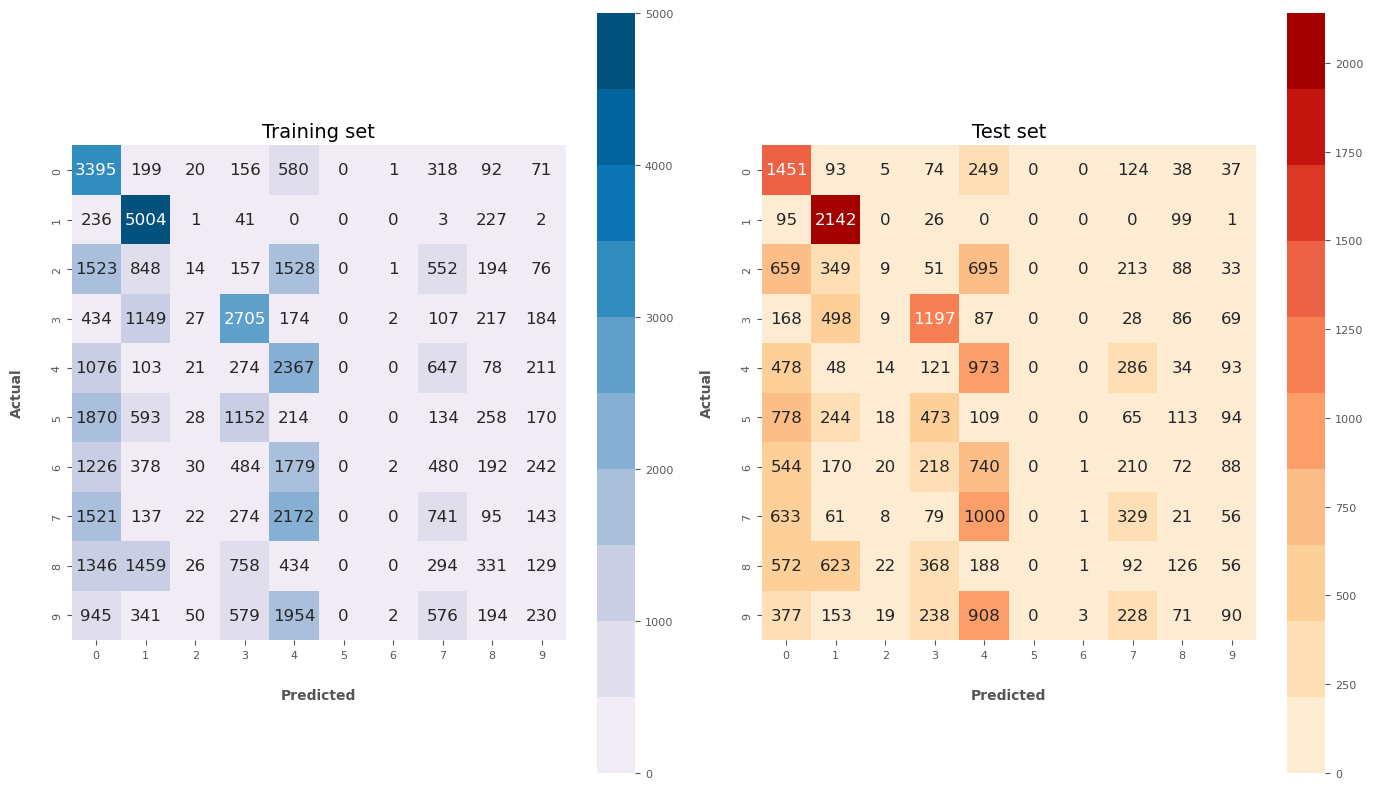

In [43]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(t_train, y_train_reduced),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(t_test, y_test_reduced),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
print(f'Training set features {i1} and {i2}')
print(classification_report(t_train, y_train_reduced))
print('Test set features {i1} and {i2}')
print(classification_report(t_test, y_test_reduced))

Training set features 350 and 410
              precision    recall  f1-score   support

           0       0.25      0.70      0.37      4832
           1       0.49      0.91      0.64      5514
           2       0.06      0.00      0.01      4893
           3       0.41      0.54      0.47      4999
           4       0.21      0.50      0.30      4777
           5       0.00      0.00      0.00      4419
           6       0.25      0.00      0.00      4813
           7       0.19      0.15      0.17      5105
           8       0.18      0.07      0.10      4777
           9       0.16      0.05      0.07      4871

    accuracy                           0.30     49000
   macro avg       0.22      0.29      0.21     49000
weighted avg       0.23      0.30      0.22     49000

Test set features {i1} and {i2}
              precision    recall  f1-score   support

           0       0.25      0.70      0.37      2071
           1       0.49      0.91      0.64      2363
           2

/Users/giorgio/opt/anaconda3/envs/py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/giorgio/opt/anaconda3/envs/py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/giorgio/opt/anaconda3/envs/py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

<br>
<br>